In [190]:
from urllib.request import urlopen
from matplotlib import pyplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

# If we are using PyCharm dark mode, the image will be inverted unless we do this
pyplot.style.use('dark_background')

In [191]:
data = pd.read_csv('California_Egg_Data.csv')
image_urls = data['IMAGE URL']

In [258]:
req = urlopen(image_urls[0])

In [259]:
image = np.asarray(bytearray(req.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [260]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

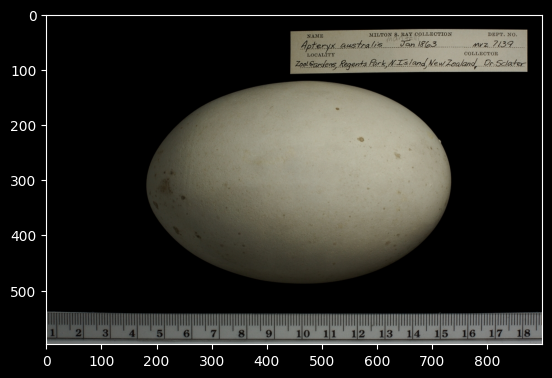

In [261]:
plt.imshow(image)

In [262]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

https://learnopencv.com/contour-detection-using-opencv-python-c/
opencv code for threshold and for finding contours
Hyper-parameters could probably use some tweaking, but for now these values always get the eggs and exclude most text

In [263]:
ret, thresh = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY)

contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 63, 165,  67],
        ...,
        [ 87, 181,  87],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

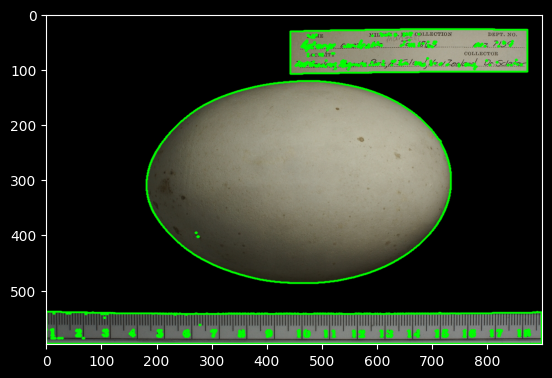

In [264]:
plt.imshow(image_copy1)

https://www.geeksforgeeks.org/find-circles-and-ellipses-in-an-image-using-opencv-python/
Blob detection to find just the eggs and not the text or the rectangle for the notes

In [265]:
contour_list = []
for contour in contours1:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if (len(approx) > 8) & (len(approx) < 23) & (area > 30):
        contour_list.append(contour)

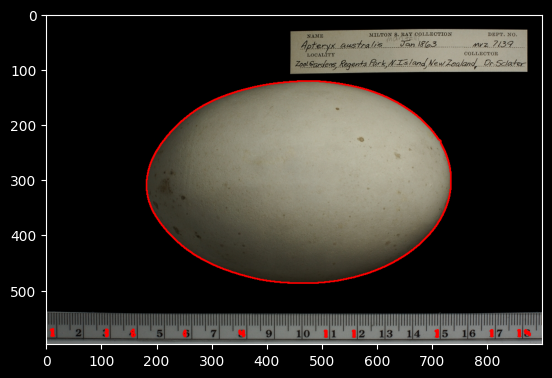

In [266]:
cv2.drawContours(image, contour_list,  -1, (255,0,0), 2)
plt.imshow(image)